# Exploratory Data Analysis : Haberman's Survival

Information about Problem:

The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

### Importing Libraries

In [394]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


Reading Data

In [395]:
data = pd.read_csv('haberman.csv')

In [396]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [397]:
print ('The shape of the data:',data.shape)

The shape of the data: (306, 4)


In [398]:
print('The columns of the data:',data.columns)

The columns of the data: Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [399]:
print('The unique values for target variable:',data['status'].unique())

The unique values for target variable: [1 2]


In [400]:
print('The unique value count for each class in status:',data["status"].value_counts())

The unique value count for each class in status: 1    225
2     81
Name: status, dtype: int64


In [401]:
print('The percentage distribution for each class in status:\n\n',(data["status"].value_counts()/data.shape[0]*100))

The percentage distribution for each class in status:

 1    73.529412
2    26.470588
Name: status, dtype: float64


In [402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [403]:
#confirm for missing values
print(data.isna().sum())
print('\n No missing values found in any observation')

age       0
year      0
nodes     0
status    0
dtype: int64

 No missing values found in any observation


In [404]:
#see data statictics
print('The data statistics:\n\n',data.describe())

The data statistics:

               age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [405]:
#renaming values of target variable for easy of understanding
data['status'] = data['status'].map({1:'Yes', 2:'No'})
data.head() 

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


## Univariate analysis

### Target Variable

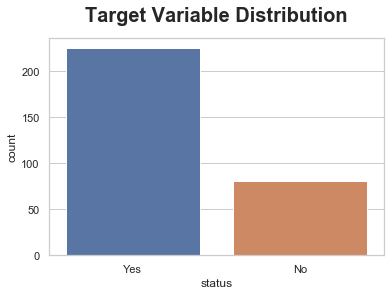

In [406]:
#https://stackoverflow.com/questions/18962063/matplotlib-setting-title-bold-while-using-times-new-roman
#https://stackoverflow.com/questions/25036699/how-to-increase-plt-title-font-size
#https://stackoverflow.com/questions/68095237/are-there-anyway-to-specify-the-position-of-title-in-pie-chart-using-matplotlib
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html

sns.set(style="whitegrid")
sns.countplot(x='status',  data=data)
plt.title('Target Variable Distribution', fontsize=20,fontweight="bold",pad=16)
plt.show()

In [407]:
print('The target column is imbalanced with 73% of values are survived - class1')

The target column is imbalanced with 73% of values are survived - class1


### Histogram and kde for each variable with target variable

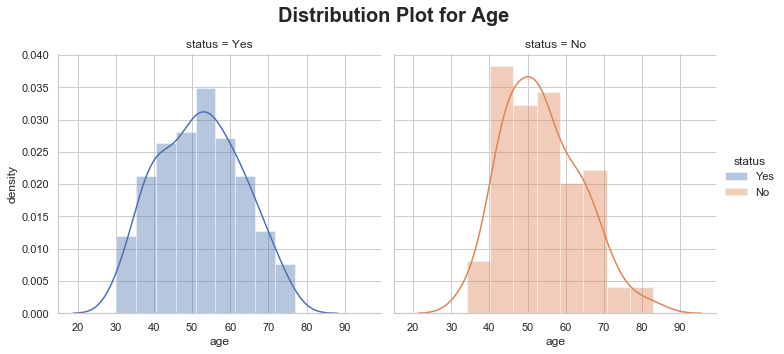

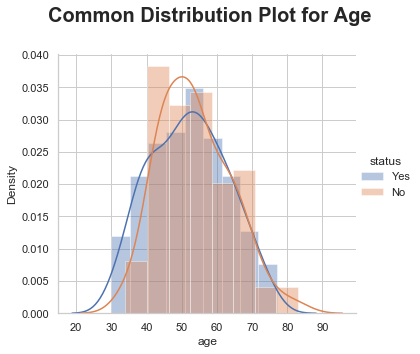

In [408]:
#https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
ax= sns.FacetGrid(data, col="status", size=5,hue='status').map(sns.distplot,"age").add_legend();
ax.set_ylabels(label='density')
ax.fig.subplots_adjust(top=0.85) 
ax.fig.suptitle('Distribution Plot for Age', fontsize=20,fontweight="bold")
plt.show();

ax = sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "age").add_legend();
ax.fig.subplots_adjust(top=0.85) 
ax.fig.suptitle('Common Distribution Plot for Age', fontsize=20,fontweight="bold")
plt.ylabel('Density')
plt.show();


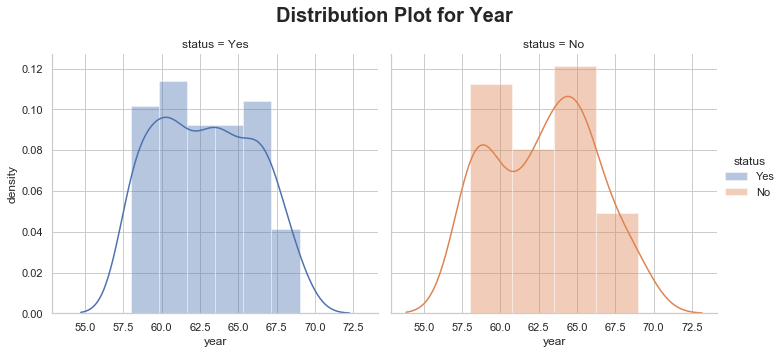

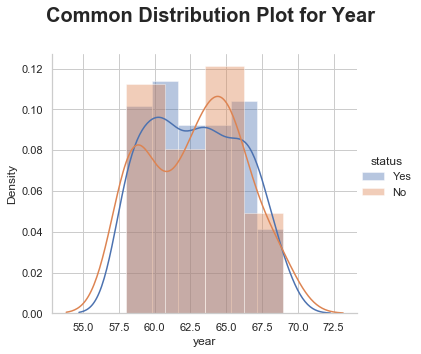

In [409]:
ax = sns.FacetGrid(data, col="status", size=5,hue='status').map(sns.distplot, "year").add_legend();
ax.set_ylabels(label='density')
ax.fig.subplots_adjust(top=0.85) 
ax.fig.suptitle('Distribution Plot for Year', fontsize=20,fontweight="bold")
plt.show();

ax = sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "year").add_legend();
ax.fig.subplots_adjust(top=0.85) 
ax.fig.suptitle('Common Distribution Plot for Year', fontsize=20,fontweight="bold")
plt.ylabel('Density')
plt.show();


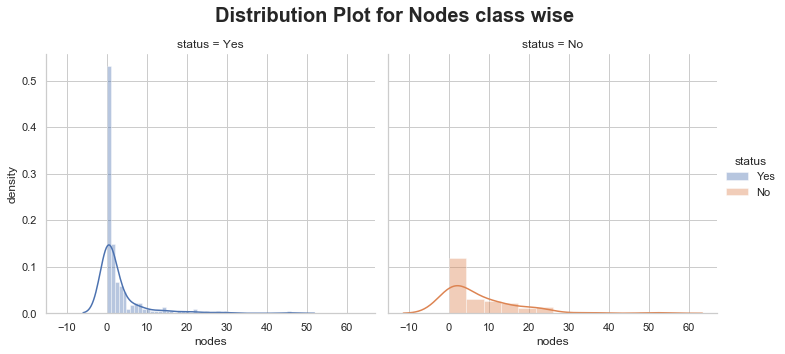

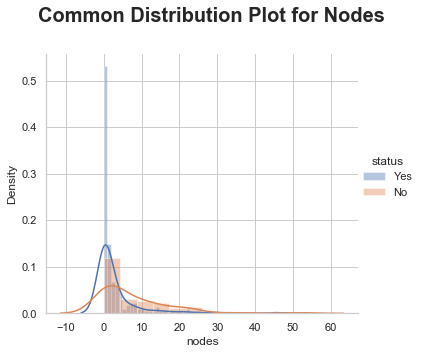

In [410]:
ax =sns.FacetGrid(data, col="status", size=5,hue='status').map(sns.distplot,"nodes").add_legend();
ax.set_ylabels(label='density')
ax.fig.subplots_adjust(top=0.85) 
ax.fig.suptitle('Distribution Plot for Nodes class wise', fontsize=20,fontweight="bold")
plt.ylabel('Density')
plt.show();


ax = sns.FacetGrid(data, hue="status", size=5).map(sns.distplot, "nodes").add_legend();
ax.fig.subplots_adjust(top=0.85) 
ax.fig.suptitle('Common Distribution Plot for Nodes', fontsize=20,fontweight="bold")
plt.ylabel('Density')
plt.show();



Observations:
    
1. For variables age and year, there is a good overlap in both classes for status especially for variable year so we cannot interpret much.

2. For variable nodes, there is some difference as for class 2, the points are a bit spreadout.

3. We can see for the points in variable nodes for class 1, the points are highly densed in the range 0-5.

### PDF & CDF for each variable

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


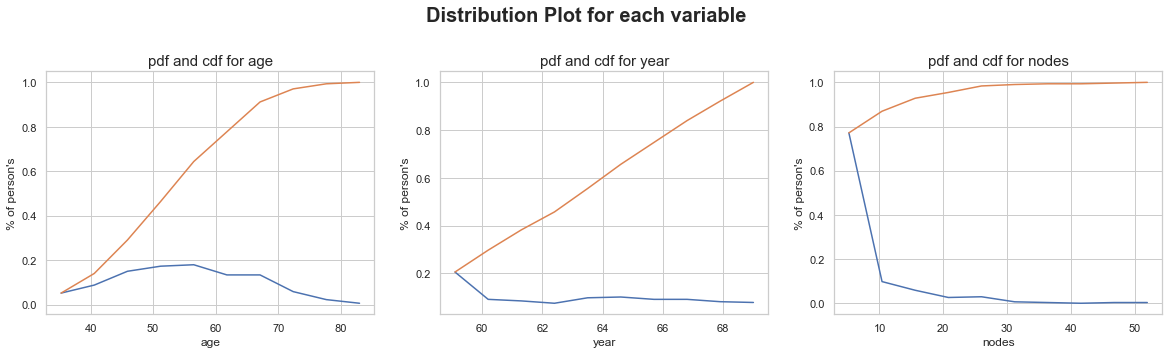

In [411]:
#reference - https://medium.com/@rndayala/eda-on-haberman-data-set-c9ee6d51ab0a

plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    
    counts, bin_edges = np.histogram(data[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.subplots_adjust(top=0.8) 
    plt.suptitle('Distribution Plot for each variable', fontsize=20,fontweight="bold")
    plt.title('pdf and cdf for {}'.format(feature), fontsize=15)
    plt.xlabel(feature)
    plt.ylabel("% of person's")

### PDF & CDF for each variable with target variable

[0.01059102 0.02420804 0.02647754 0.03101655 0.03328605 0.02420804
 0.01361702 0.00680851]
[0.06222222 0.14222222 0.15555556 0.18222222 0.19555556 0.14222222
 0.08       0.04      ]
[30.    35.875 41.75  47.625 53.5   59.375 65.25  71.125 77.   ]
[0.00806248 0.0382968  0.03224994 0.03426556 0.02015621 0.02217183
 0.00403124 0.00403124]
[0.04938272 0.2345679  0.19753086 0.20987654 0.12345679 0.13580247
 0.02469136 0.02469136]
[34.    40.125 46.25  52.375 58.5   64.625 70.75  76.875 83.   ]


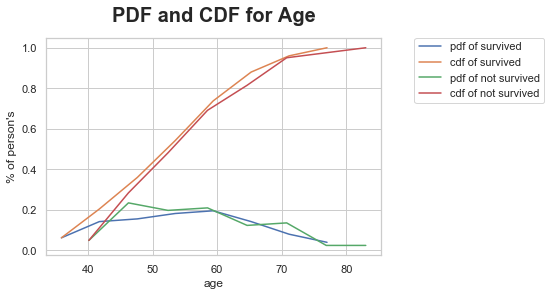

In [412]:
survived = data[data["status"] == 'Yes']
not_survived = data[data["status"] == 'No']
label = ["pdf of survived", "cdf of survived", "pdf of not survived", "cdf of not survived"]



counts, bin_edges = np.histogram(survived['age'], bins=8, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(not_survived['age'], bins=8, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.title("PDF and CDF for Age",fontsize = 20,fontweight="bold",pad=16)
plt.xlabel("age")
plt.ylabel("% of person's")
plt.legend(label,loc=(1.1,0.7))
plt.show();



##### Observation:

We can see here below age 40, looks like everyone survived


[0.13575758 0.07757576 0.12606061 0.07111111 0.07434343 0.11959596
 0.06787879 0.05494949]
[0.18666667 0.10666667 0.17333333 0.09777778 0.10222222 0.16444444
 0.09333333 0.07555556]
[58.    59.375 60.75  62.125 63.5   64.875 66.25  67.625 69.   ]
[0.18855219 0.0359147  0.08978676 0.07182941 0.07182941 0.17059484
 0.0359147  0.06285073]
[0.25925926 0.04938272 0.12345679 0.09876543 0.09876543 0.2345679
 0.04938272 0.08641975]
[58.    59.375 60.75  62.125 63.5   64.875 66.25  67.625 69.   ]


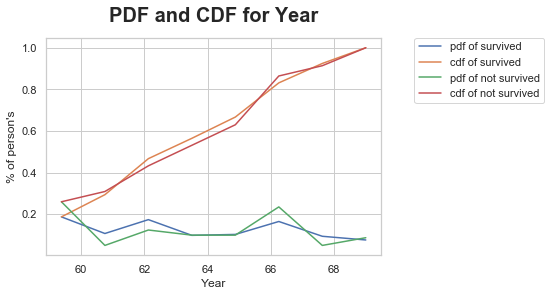

In [413]:
survived = data[data["status"] == 'Yes']
not_survived = data[data["status"] == 'No']
label = ["pdf of survived", "cdf of survived", "pdf of not survived", "cdf of not survived"]

counts, bin_edges = np.histogram(survived['year'], bins=8, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(not_survived['year'], bins=8, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.title("PDF and CDF for Year",fontsize=20,fontweight="bold",pad=16)
plt.xlabel("Year")
plt.ylabel("% of person's")
plt.legend(label,loc=(1.1,0.7))
plt.show();

[0.1468599  0.01468599 0.00541063 0.00386473 0.00154589 0.00077295
 0.         0.00077295]
[0.84444444 0.08444444 0.03111111 0.02222222 0.00888889 0.00444444
 0.         0.00444444]
[ 0.    5.75 11.5  17.25 23.   28.75 34.5  40.25 46.  ]
[0.09306743 0.02469136 0.01899335 0.01329535 0.         0.00189934
 0.         0.00189934]
[0.60493827 0.16049383 0.12345679 0.08641975 0.         0.01234568
 0.         0.01234568]
[ 0.   6.5 13.  19.5 26.  32.5 39.  45.5 52. ]


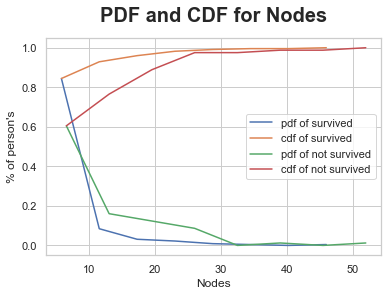

In [414]:
survived = data[data["status"] == 'Yes']
not_survived = data[data["status"] == 'No']
label = ["pdf of survived", "cdf of survived", "pdf of not survived", "cdf of not survived"]

counts, bin_edges = np.histogram(survived['nodes'], bins=8, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(not_survived['nodes'], bins=8, 
                                 density = True)
print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)


#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.title("PDF and CDF for Nodes",fontsize = 20,fontweight="bold",pad=16)
plt.xlabel("Nodes")
plt.ylabel("% of person's")
plt.legend(label)
plt.show();

##### Observations: 
    
Approximately 80% of the survived patients have less than or equal to 5 nodes.

Approximately 90% of the survived (class1) patients & 70% of the not-survived (class2) have less than or equal to 10 nodes.

### Box Plots

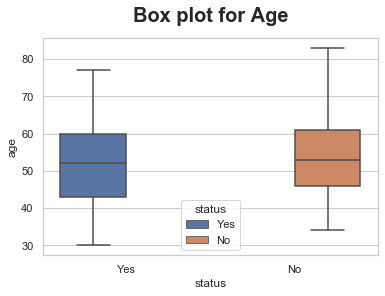

In [415]:
sns.boxplot(x='status',y='age', hue='status',data=data)
plt.title("Box plot for Age",fontsize = 20,fontweight="bold",pad=16)
plt.show()

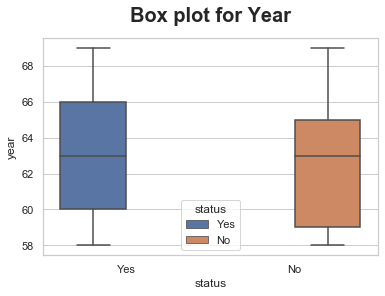

In [416]:
sns.boxplot(x='status',y='year', hue='status',data=data)
plt.title("Box plot for Year",fontsize = 20,fontweight="bold",pad=16)
plt.show()

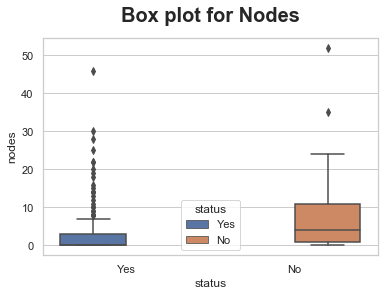

In [417]:
sns.boxplot(x='status',y='nodes', hue='status',data=data)
plt.title("Box plot for Nodes",fontsize = 20,fontweight="bold",pad=16)
plt.show()

##### Observations:
    
1. Here we can confirm the overlap in variable age and year which makes it difficult to classify points using them

2. There is a overlap in variable nodes as well but it is less compared to other variables

3. People with less nodes have higher chances of survival (class1)

### Violin Plot

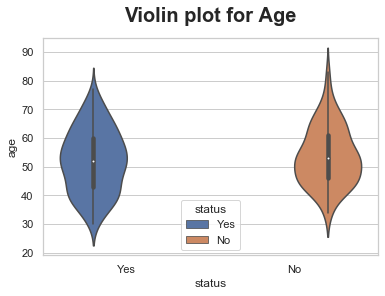

In [418]:
sns.violinplot(x="status", y="age",hue='status', data=data)
plt.title("Violin plot for Age",fontsize = 20,fontweight="bold",pad=16)
plt.show()

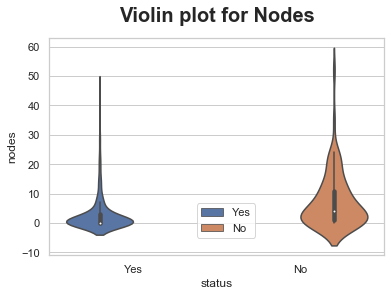

In [419]:
#https://stackoverflow.com/questions/53733755/how-to-move-legend-to-outside-of-a-seaborn-scatterplot
sns.violinplot(x="status", y="nodes",hue='status', data=data)
plt.title("Violin plot for Nodes",fontsize = 20,fontweight="bold",pad=16)
plt.legend(loc=(0.44,0.081))
plt.show()

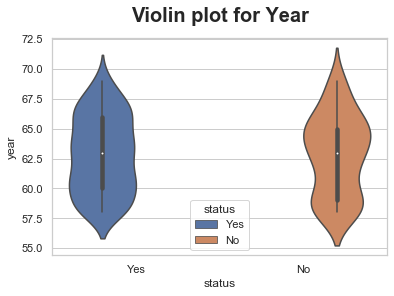

In [420]:
sns.violinplot(x="status", y="year",hue='status', data=data)
plt.title("Violin plot for Year",fontsize = 20,fontweight="bold",pad=16)
plt.show()

### Bivariate Analysis





#### Scatter Plot

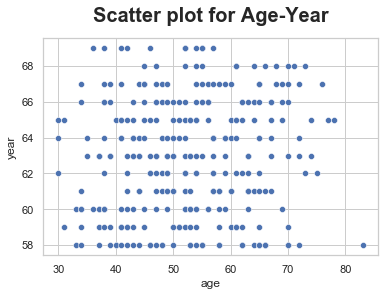

In [421]:
sns.scatterplot(data=data, x="age", y="year")
plt.title("Scatter plot for Age-Year",fontsize = 20,fontweight="bold",pad=16)
plt.show()

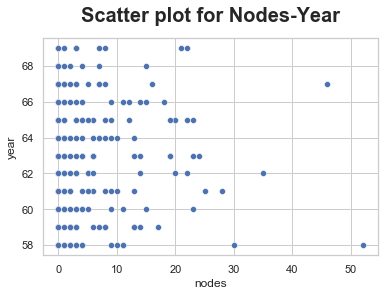

In [422]:
sns.scatterplot(data=data, x="nodes", y="year")
plt.title("Scatter plot for Nodes-Year",fontsize = 20,fontweight="bold",pad=16)
plt.show()

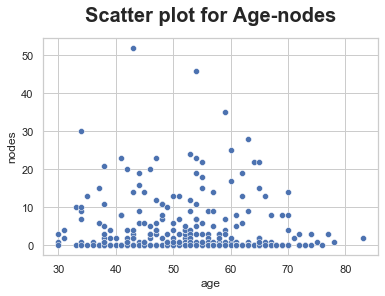

In [423]:

sns.scatterplot(data=data, x="age", y="nodes")
plt.title("Scatter plot for Age-nodes",fontsize = 20,fontweight="bold",pad=16)
plt.show()


##### Observation:
    
We can not see any proper relation among variables here. No linear relation visible too here

### Pairplot with color encoding on target variable

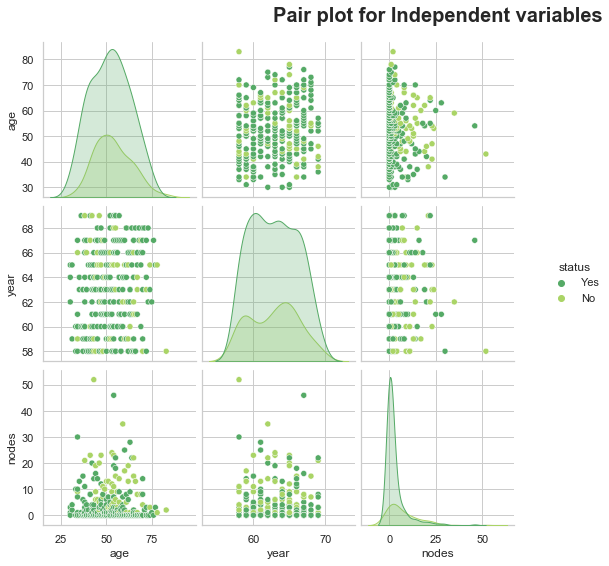

In [424]:
sns.pairplot(data,vars=['age','year','nodes'],hue='status',palette='summer')
plt.title("Pair plot for Independent variables",fontsize = 20,fontweight="bold",pad=184)
plt.show()

##### Observations:
    
1. People with close to zero nodes are more likely to survive irrespective of their age

2. Even with variable year, zero nodes interprets survival in any year

3. Beyond 50 nodes, it seems like people do not survive.

### Contour Plot

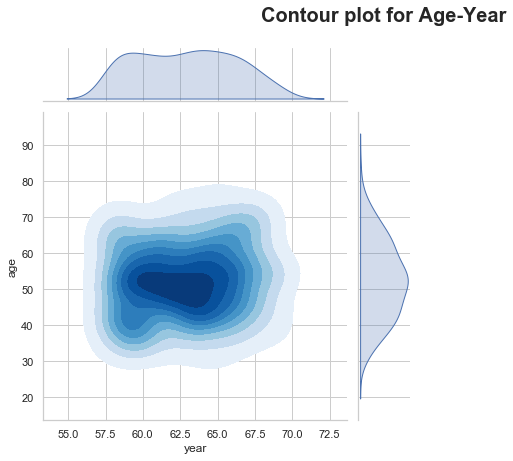

In [425]:
#https://stackoverflow.com/questions/63842336/seaborn-kde-jointplot-doesnt-have-color-mapping-in-the-latest-version-0-11-0
sns.jointplot(x ='year', y = 'age', data = data, kind = 'kde',fill='True',cmap='Blues')
plt.title("Contour plot for Age-Year",fontsize = 20,fontweight="bold",pad=90)
plt.show()



##### Observations:
    
More people had operations ageing between 46-54 in between years 1960-1964


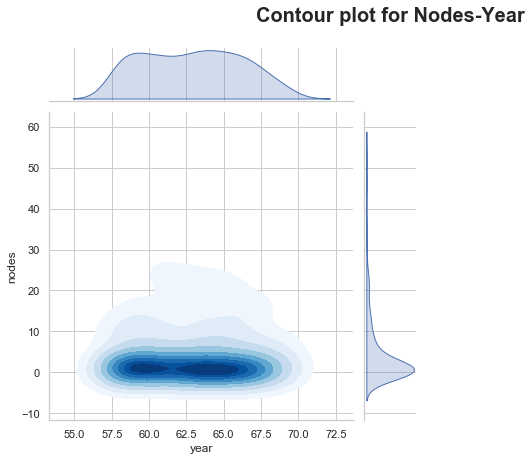

In [426]:
sns.jointplot(x ='year', y = 'nodes', data = data, kind = 'kde',fill='True',cmap='Blues')
plt.title("Contour plot for Nodes-Year",fontsize = 20,fontweight="bold",pad=90)
plt.show()



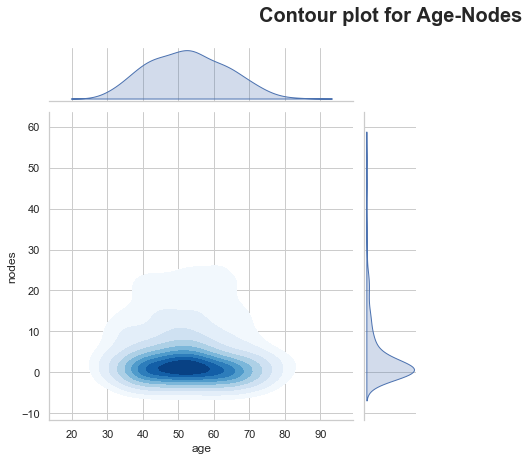

In [427]:
sns.jointplot(x ='age', y = 'nodes', data = data, kind = 'kde',fill='True',cmap='Blues')
plt.title("Contour plot for Age-Nodes",fontsize = 20,fontweight="bold",pad=90)
plt.show()



##### Observations:
    
People having close to zero nodes can be seen more between the age 45-60 

In [428]:
data['status'] = data['status'].map({'Yes':1, 'No':0})
data.head() 

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Correlation table & Heatmap

In [429]:
data.corr()

,age,year,nodes,status
age,1.000000,0.089529,-0.063176,-0.067950
year,0.089529,1.000000,-0.003764,0.004768
nodes,-0.063176,-0.003764,1.000000,-0.286768
status,-0.067950,0.004768,-0.286768,1.000000


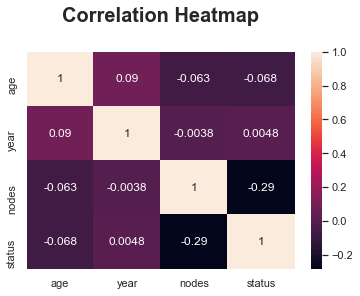

In [430]:

ax = sns.heatmap(data.corr(), annot = True)
ax.get_ylim()
ax.set_ylim(4.0, 0)
plt.title("Correlation Heatmap",fontsize = 20,fontweight="bold",pad=30)
plt.show()



##### Observations:
    
We cannot see relation between the independent variables among themselves or with the dependent variable - status



### Conclusion

1. Firstly, it is a small dataset so a bit hard to make firm conclusions

2. We have an imbalanced dataset with around 73% as survived and the rest as non-survived

3. Around 75% of the people have less than 5 nodes and around 25% of the people have no nodes

4. For variables age and year, there is a good overlap in both classes for status especially for variable year so we cannot interpret much.

5. For variable nodes, there is a overlap but we can see some difference as for class 2, the points are a bit spreadout.

6. Even the box plot and violin plot confirms the same

7. Approximately 80% of the survived patients have less than or equal to 5 nodes.

8. Approximately 90% of the survived (class1) patients & 70% of the not-survived (class2) have less than or equal to 10 nodes

9. This shows we have few outliers in the nodes variable

10. There are no precise patterns visible among the variables 

11. Though Few patterns which we can interpret from scatter plot/ pairplot / contour plot are as follows:

 a) More people had operations ageing between 46-54 in between years 1960-1964

 b) People having close to zero nodes can be seen more between the age 45-60

 c) People with close to zero nodes are more likely to survive irrespective of their age

 d) Even with variable year, zero nodes interprets survival in any year

 e) Beyond 50 nodes, it seems like people do not survive.

12. There is no linear relation between independent variables among themselves or with the dependent variable - status

